# Tutorial 1 - Introduction To Machine Learning

> Natutral Language Processing course - 097215



## Importing The Data

In [1]:
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split

Run the next cell in linux for dowloading the data:

In [2]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Amazon_Instant_Video_5.json.gz

--2021-09-08 16:32:44--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Amazon_Instant_Video_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9517526 (9.1M) [application/x-gzip]
Saving to: ‘reviews_Amazon_Instant_Video_5.json.gz’

reviews_Amazon_Inst 100%[===================>]   9.08M  10.4MB/s    in 0.9s    

2021-09-08 16:32:45 (10.4 MB/s) - ‘reviews_Amazon_Instant_Video_5.json.gz’ saved [9517526/9517526]



In [3]:
DATA_PATH = 'reviews_Amazon_Instant_Video_5.json.gz'
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

original_data = getDF(DATA_PATH)
original_data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009"
...,...,...,...,...,...,...,...,...,...
37121,A1ELO9LMSE1CQ7,B00LPWPMCS,Mpr90,"[0, 0]",I love the books! The show is amazing so far. ...,5.0,Great Series!,1405728000,"07 19, 2014"
37122,AGOEKVIJV9UX6,B00LPWPMCS,Mr. Markster,"[13, 15]","""The Strain"" has potential to be an excellent ...",5.0,Forget the Vampire Diaries -- This is a REAL V...,1405296000,"07 14, 2014"
37123,A3I291BE0RNZCU,B00LPWPMCS,Rating My Best Pick,"[0, 2]","I'm not real sure on how, I should rate this s...",3.0,It's only the first episode so I'm not real su...,1405296000,"07 14, 2014"
37124,A1MNITZRYU71IO,B00LPWPMCS,"Sherry ""trying in ohio""","[1, 1]",episode one so far makes me want to watch more...,4.0,and that is good. The accents are a bit much h...,1405296000,"07 14, 2014"


In [4]:
data = original_data.copy()
data = data[['reviewText', 'overall']]
data['label'] = data['overall'] > 3
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.drop(columns='overall', inplace=True)
data.replace({False: "Negative", True: "Positive"}, inplace=True)
data

,reviewText,label
0,I had big expectations because I love English ...,Negative
1,I highly recommend this series. It is a must f...,Positive
2,This one is a real snoozer. Don't believe anyt...,Negative
3,Mysteries are interesting. The tension betwee...,Positive
4,"This show always is excellent, as far as briti...",Positive
...,...,...
37121,I love the books! The show is amazing so far. ...,Positive
37122,"""The Strain"" has potential to be an excellent ...",Positive
37123,"I'm not real sure on how, I should rate this s...",Negative
37124,episode one so far makes me want to watch more...,Positive


In [5]:
train, test = train_test_split(data,  test_size=0.2, random_state=42)

##Creating The TF-IDF Representations

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
train_x, train_y = train['reviewText'].tolist(), train['label'].tolist()
test_x, test_y = test['reviewText'].tolist(), test['label'].tolist()

In [8]:
tf_vectorizer = TfidfVectorizer(lowercase=True, stop_words=None)
train_vec = tf_vectorizer.fit_transform(train_x)
test_vec = tf_vectorizer.transform(test_x)

In [9]:
print(train_vec.shape)
print(test_vec.shape)

(29695, 49221)
(7424, 49221)


## Training The Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(train_vec, train_y)

## Testing The Model

In [12]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
test_pred = classifier.predict(test_vec)

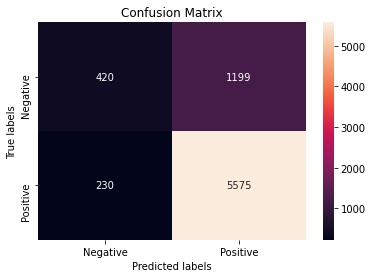

In [14]:
labels = classifier.classes_.tolist()
cm = confusion_matrix(test_y, test_pred, labels)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [15]:
f1 = f1_score(test_y, test_pred, pos_label='Positive')
recall = recall_score(test_y, test_pred, pos_label='Positive')
precision = precision_score(test_y, test_pred, pos_label='Positive')
accuracy = accuracy_score(test_y, test_pred)
print(f'Accuracy is: {accuracy}')
print(f'Recall is: {recall}')
print(f'Precision is: {precision}')
print(f'F1 is: {f1}')


Accuracy is: 0.8075161637931034
Recall is: 0.9603789836347976
Precision is: 0.8229997047534692
F1 is: 0.8863979648620717
